# Preprocesamiento de textos.


Instalación de bibliotecas.

In [ ]:
!pip install textblob
!pip install -U textblob-fr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.2/561.2 kB 10.5 MB/s eta 0:00:00


In [ ]:
!pip install nltk
!pip install nltk spacy
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
!python -m spacy download es_core_news_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 41.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
zip_path = '/content/Textos Limpios-20240416T132551Z-001.zip'
extract_to = '/content'

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extraction complete.")
except FileNotFoundError:
    print("The specified ZIP file does not exist.")
except zipfile.BadZipFile:
    print("The specified file is not a ZIP file or it is corrupted.")


Extraction complete.


## Digitalización y Limpieza.

Cada texto lo transformaremos y los pasaremos a un diccionario. Para cada uno realizaremos la limpieza de datos pertinente.


In [ ]:
# Directory containing the text files
directory = '/content/Textos Limpios'

# Dictionary to hold filename and content
textos = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)

        try:
            # Attempt to open the file with UTF-8
            with open(file_path, 'r', encoding='utf-8') as file:
                data = file.read()
        except UnicodeDecodeError:
            # If UTF-8 fails, try a different encoding, e.g., ISO-8859-1
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                data = file.read()

        # Use the filename as the key and the file content as the value
        textos[filename] = data





In [ ]:
# Convert dictionary keys to a list and access by index
keys_list = list(textos.keys())
print(keys_list[0])

Guilles Deleuze y Felix Guattari - Dosse.txt


In [ ]:
textos['Juventud en Viena - Arthur Schnitzler.txt']

'PRIMER LIBRO\nDE MAYO DE 1862 A MAYO DE 1875\n\n\nVine al mundo en Viena el 15 de mayo de 1862, en la Praterstrasse, que por entonces se llamaba Jägerzeile, en el tercer piso de la casa que limita con el hotel Europa, y, a las pocas horas \x97mi padre me lo ha contado muchas veces\x97, me tumbaron un rato sobre su escritorio. Ya no recuerdo si fue el ama de cría o mi propio padre quien me adjudicó aquel, con todo, inusual acomodo para un recién nacido; a él, en cualquier caso, el hecho le dio pie una y otra vez a vaticinar en broma que, lógicamente, haría carrera como escritor; vaticinio que, por cierto, no habría de ver cumplido más que en un grado modesto y jamás con entera satisfacción.\nLa familia de mi padre era oriunda de Gross-Kanisza, una ciudad mediana de Hungría; parece ser que originariamente se apellidaba Zimmermann, pero en la época de mi abuelo adoptó el nombre de Schnitzler, o le fue impuesto por una alta instancia. Mi abuela, Rosalie, era hija de un tal David Klein de 

De manera preeliminar, al hacer la transformación a txts, encontramos caracteres especiales con los cuales lidearemos en nuestra limoieza "/n", "\x86" etc. Además, al tratarse de español también es neceario lidear con acentos y tildes.

Para la preparación de los textos seguiremos el siguiente pipeline:



1. Convertir el texto a minúsculas: Esto ayuda a mantener la consistencia ya que "Hola" y "hola" deben ser tratados de la misma manera en el análisis.
2. Eliminar puntuación y caracteres especiales: La puntuación a menudo puede ser irrelevante para el análisis de sentimientos.
3. Eliminar palabras vacías: Estas son palabras comunes que pueden no contribuir al sentimiento, como "y", "el", etc.
4. Tokenización: Dividir el texto en palabras o tokens.
5. Lematización/Conjugación: Reducir las palabras a su forma base o raíz.



In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

# Stopwords set
stop_words = set(stopwords.words('spanish'))




def clean_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)

    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Update dictionary with cleaned text
for filename in textos:
    data = textos[filename]
    # Clean the data
    cleaned_data = clean_text(data)
    # Update the dictionary with cleaned data
    textos[filename] = cleaned_data




[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
textos['Juventud en Viena - Arthur Schnitzler.txt']

'primer libro mayo 1862 mayo 1875 vine mundo viena 15 mayo 1862 praterstrasse entonces llamaba jägerzeile tercer piso casa limita hotel europa pocas horas \x97mi padre contado muchas veces\x97 tumbaron rato escritorio recuerdo si ama cría propio padre adjudicó aquel inusual acomodo recién nacido cualquier caso hecho dio pie vez vaticinar broma lógicamente haría carrera escritor vaticinio cierto ver cumplido grado modesto jamás enteron satisfacción familia padre oriunda grosskanisza ciudad mediana hungría parece ser originariamente apellidaba zimmermann época abuelo adoptó nombre schnitzler impuesto alta instancia abuela rosalie hija tal david klein puszta kovacsi palatinado zala esposa marie soltera rechnitz rama paterna árbol genealógico puedo remontarme atrás abuelo carpintero \x97como visto antecesores inmediatos\x97 vivió junto siempre condiciones humildes menesterosas incluso final carta envió padre pocos días después nacimiento leía deseo « nieto trajera abuelo dicha tan inmiseri

Aún tenemos un problema con el caracter "\x97" (representa un guion largo), vamos a removerlo. Redefinimos ```clean_text``` y volvemos a correrlo.



In [ ]:
def clean_text(text):

    text = text.replace('\x97', '—')

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))
    #Tokenizamos el text
    tokens = word_tokenize(text)
    # Quitamos stop words y lematizamos
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Creamos el diccionario con text limpio
for filename in textos:
    data = textos[filename]

    cleaned_data = clean_text(data)

    textos[filename] = cleaned_data

In [ ]:
textos['Juventud en Viena - Arthur Schnitzler.txt']

'primer libro mayo 1862 mayo 1875 vine mundo viena 15 mayo 1862 praterstrasse entonces llamaba jägerzeile tercer piso casa limita hotel europa pocas horas —mi padre contado muchas veces— tumbaron rato escritorio recuerdo si ama cría propio padre adjudicó aquel inusual acomodo recién nacido cualquier caso hecho dio pie vez vaticinar broma lógicamente haría carrera escritor vaticinio cierto ver cumplido grado modesto jamás enteron satisfacción familia padre oriunda grosskanisza ciudad mediana hungría parece ser originariamente apellidaba zimmermann época abuelo adoptó nombre schnitzler impuesto alta instancia abuela rosalie hija tal david klein puszta kovacsi palatinado zala esposa marie soltera rechnitz rama paterna árbol genealógico puedo remontarme atrás abuelo carpintero —como visto antecesores inmediatos— vivió junto siempre condiciones humildes menesterosas incluso final carta envió padre pocos días después nacimiento leía deseo « nieto trajera abuelo dicha tan inmisericordemente d

El texto da oportunidad de que se pudea profundizar mas en el preprocesamiento, aunque eso no necesariamente podria aumentar la precisión de nuestro análisis de sentimiento.

Especialmente para caracteres especiales que no aporten significado.


In [ ]:
!pip install polyglot pyicu pycld2 morfessor


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.3/262.3 kB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52561 sha256=3f3b04a126fab1b9424efbaebb4944a1d39a43977fde63e28778d5a44e2c21d8
  Stored in directory: /root/.cache/pip/wheels/aa/92/4a/b172589446ba537db3bdb9a1f2204f27fe71217981c14ac368
  Created wheel for pyicu: filename=PyICU-2.13-cp310-cp310-linux_x86_64.whl size=1780078 sha256=ba34cd4b7b58aed35b2b5a8fa64436d94ced456a34d5d3afc1e7d6d1a3403d23
  Stored in directory: /root/.cache/pip/wheels/32/71/07/54de19eae9b32d8a9d635f6541cebaedd2cee0410c93b44a7c
  C

In [ ]:
# Run this in your Python environment, not in the command line
from polyglot.downloader import downloader
print(downloader.supported_tasks(lang="es"))
downloader.download("sentiment2.es")

['sgns2', 'unipos', 'ner2', 'counts2', 'transliteration2', 'embeddings2', 'uniemb', 'pos2', 'sentiment2', 'tsne2', 'morph2']
[polyglot_data] Downloading package sentiment2.es to
[polyglot_data]     /root/polyglot_data...


True

In [ ]:
from polyglot.text import Text

def analyze_sentiment(text):
    poly_blob = Text(text, hint_language_code='es')  # Hint that the text is in Spanish
    # Calculate polarity (Polyglot only provides polarity)
    polarity = poly_blob.polarity
    # Polaridad no
    return {"polarity": polarity}




# Applying sentiment analysis to each text
sentiment_results_p = {key: analyze_sentiment(text) for key, text in textos.items()}
print(sentiment_results_p)


{'Guilles Deleuze y Felix Guattari - Dosse.txt': {'polarity': 0.07160493827160494}, 'Diario en Bolivia - Ernesto Che Guevara.txt': {'polarity': -0.09223623092236231}, 'El sitio de puebla en 1863 - Garcia G.txt': {'polarity': 0.20157068062827224}, 'En la ruta de la onda - Parmenides Garcia Saldaña.txt': {'polarity': -0.0010209290454313426}, 'Lucas Alaman - Andres Lira.txt': {'polarity': 0.09825829773250082}, 'Milagro - Nando Parrado.txt': {'polarity': -0.07811133780238998}, 'Fray Gregorio de la Concepcion - Fray Gregorio de la Concepcion.txt': {'polarity': 0.06382978723404255}, 'Memorias de un exnazi - David Saavedra.txt': {'polarity': -0.086414708886619}, 'Diario de Campaña durante la guerra civil española - Sanchez Cerbera.txt': {'polarity': -0.07150259067357513}, 'Nueva York ida y vuelta - Henry Miller.txt': {'polarity': 0.009316770186335404}, 'Antes de que Anochezca - Reinaldo Arenas.txt': {'polarity': -0.1768506056527591}, 'Diario de campo en Melanesia - B. Malinowski.txt': {'polar

<ipython-input-20-ff5e41f34c72>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


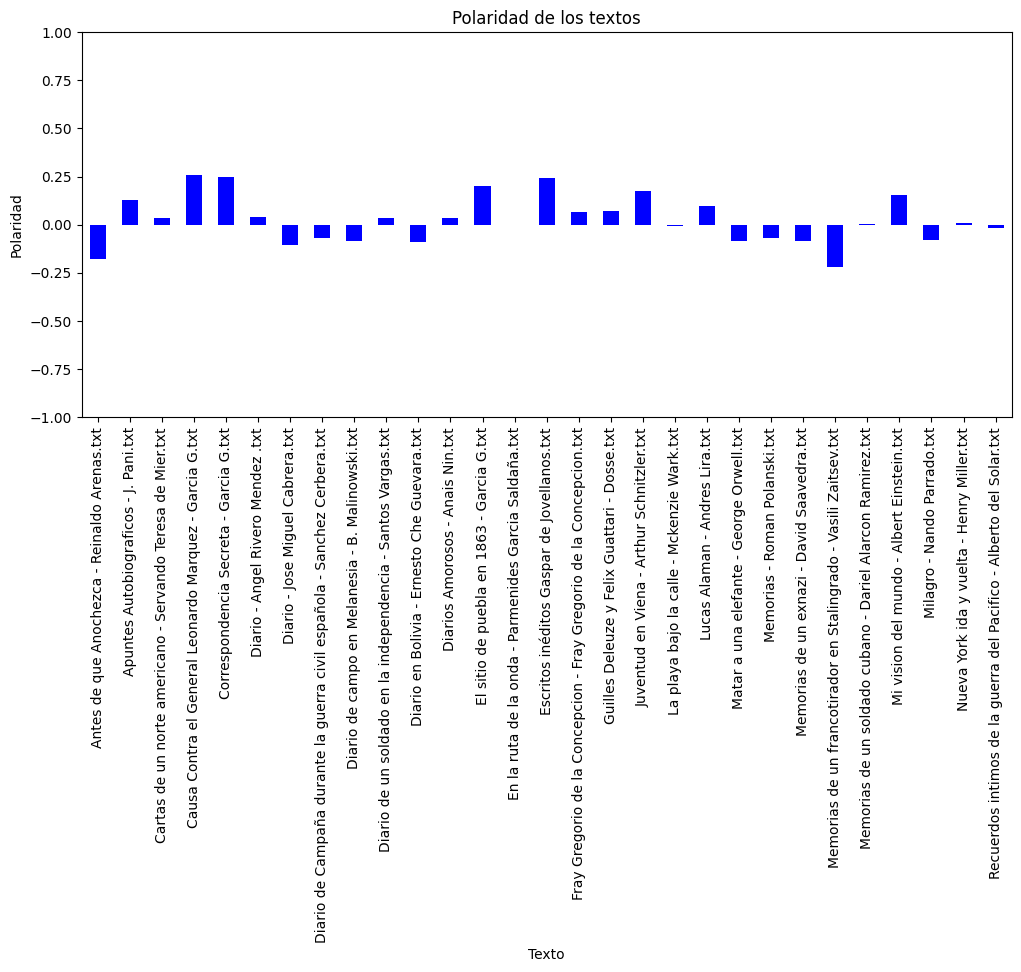

In [ ]:
dfs = pd.DataFrame.from_dict(sentiment_results_p, orient='index')
dfs.reset_index(inplace=True)
dfs.columns = ['Texto', 'Polaridad']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plotting polarity
dfs.plot(kind='bar', x='Texto', y='Polaridad', color='blue', legend=False, ax=ax)
ax.set_title('Polaridad de los textos')
ax.set_ylabel('Polaridad')
ax.set_ylim(-1, 1)

plt.tight_layout()
plt.show()


In [ ]:
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer

def analyze_sentiment(text):

    blob = TextBlob(text, analyzer=PatternAnalyzer())

    polarity, subjectivity = blob.sentiment
    return {"polarity": polarity, "subjectivity": subjectivity}


sentiment_results = {key: analyze_sentiment(text) for key, text in textos.items()}
print(sentiment_results)




{'Guilles Deleuze y Felix Guattari - Dosse.txt': {'polarity': 0.08708784131890793, 'subjectivity': 0.4048471814120952}, 'Diario en Bolivia - Ernesto Che Guevara.txt': {'polarity': -0.021759259259259277, 'subjectivity': 0.5944444444444441}, 'El sitio de puebla en 1863 - Garcia G.txt': {'polarity': 0.04842728758169953, 'subjectivity': 0.493883771457301}, 'En la ruta de la onda - Parmenides Garcia Saldaña.txt': {'polarity': 0.0980775552131484, 'subjectivity': 0.4235487017690402}, 'Lucas Alaman - Andres Lira.txt': {'polarity': 0.032022084195997266, 'subjectivity': 0.4901944501323381}, 'Milagro - Nando Parrado.txt': {'polarity': -0.12029376498800963, 'subjectivity': 0.501544259098216}, 'Fray Gregorio de la Concepcion - Fray Gregorio de la Concepcion.txt': {'polarity': 0.041233766233766185, 'subjectivity': 0.3708791208791209}, 'Memorias de un exnazi - David Saavedra.txt': {'polarity': 0.025036710719530078, 'subjectivity': 0.43305538074260563}, 'Diario de Campaña durante la guerra civil españ

<ipython-input-19-e2632726a01c>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


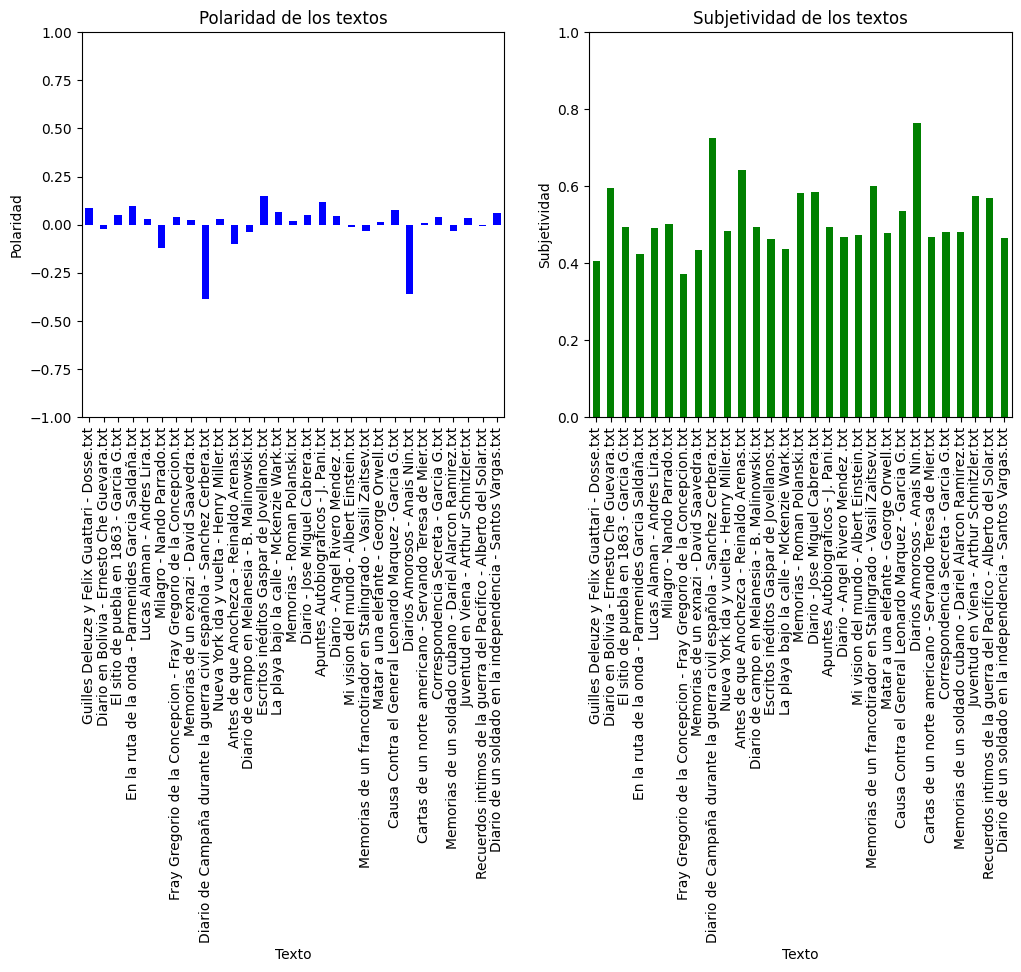

In [ ]:

df = pd.DataFrame.from_dict(sentiment_results, orient='index')
df.reset_index(inplace=True)
df.columns = ['Texto', 'Polaridad','Subjetividad']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#polaridad
df.plot(kind='bar', x='Texto', y='Polaridad', ax=axes[0], color='blue', legend=False)
axes[0].set_title('Polaridad de los textos')
axes[0].set_ylabel('Polaridad')
axes[0].set_ylim(-1, 1)

#subjetividad
df.plot(kind='bar', x='Texto', y='Subjetividad', ax=axes[1], color='green', legend=False)
axes[1].set_title('Subjetividad de los textos')
axes[1].set_ylabel('Subjetividad')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


* Gráfico de Polaridad: Este gráfico de barras muestra la polaridad de cada texto. Valores más cercanos a +1 indican sentimientos más positivos, y valores más cercanos a -1 indican sentimientos más negativos.
* Gráfico de Subjetividad: Este gráfico de barras muestra la subjetividad de cada texto. Valores más altos indican que el texto contiene más opiniones en lugar de información factual.